In [3]:
import pandas as pd
import requests
from io import StringIO

file_url = 'https://raw.githubusercontent.com/scsauers/Wine-ML/main/winequality-red.csv'

response = requests.get(file_url)
wine_data = pd.read_csv(StringIO(response.text), delimiter=',')
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

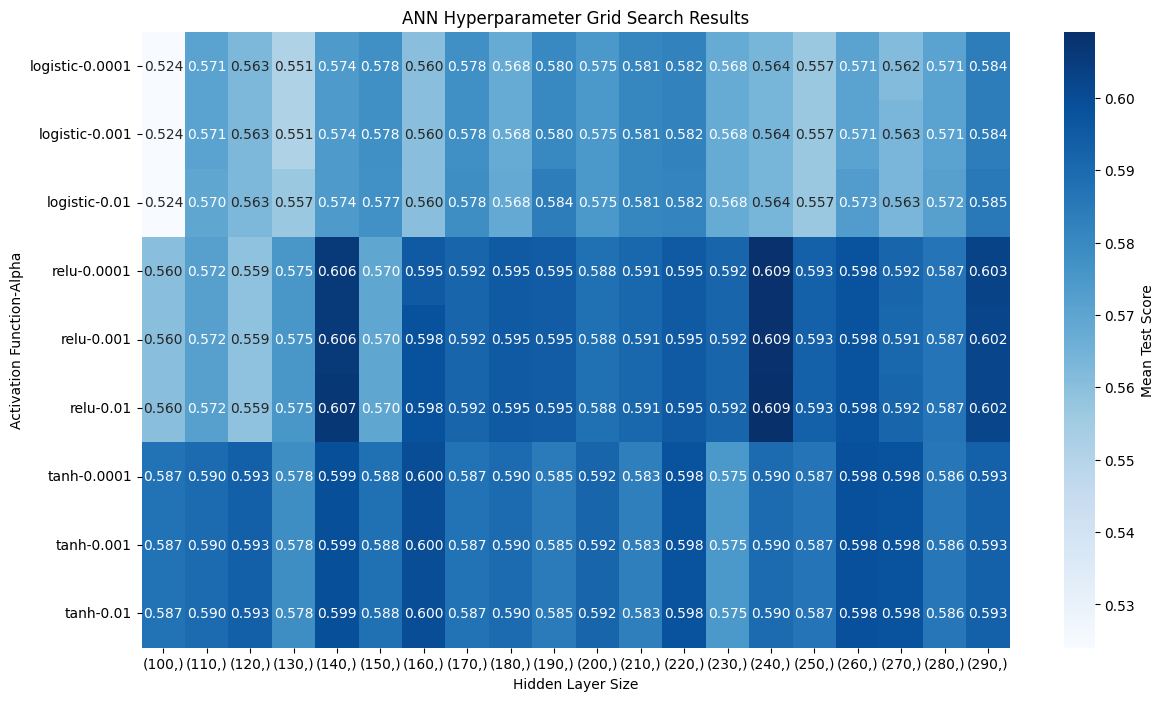

Best Hyperparameters: {'param_hidden_layer_sizes': (240,), 'param_activation': 'relu', 'param_alpha': 0.01}
Best Cross-Validation Accuracy Score: 0.6091379310344827


In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'hidden_layer_sizes': [(i,) for i in range(100, 300, 10)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

model = MLPClassifier(early_stopping=True, validation_fraction=0.1, random_state=1)
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_scaled, y)

results = pd.DataFrame(grid_search.cv_results_)
columns = ['param_hidden_layer_sizes', 'param_activation', 'param_alpha', 'mean_test_score']
heatmap_data = results[columns]
heatmap_data.reset_index(inplace=True)
heatmap_data = heatmap_data.pivot_table(index=['param_activation', 'param_alpha'],
                                       columns='param_hidden_layer_sizes', values='mean_test_score')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='.3f', cbar_kws={'label': 'Mean Test Score'})
plt.xlabel('Hidden Layer Size')
plt.ylabel('Activation Function-Alpha')
plt.title('ANN Hyperparameter Grid Search Results')
plt.show()

best_params_index = results['mean_test_score'].idxmax()
best_params = results.loc[best_params_index, ['param_hidden_layer_sizes', 'param_activation', 'param_alpha']].to_dict()
print('Best Hyperparameters:', best_params)
print('Best Cross-Validation Accuracy Score:', results.loc[best_params_index, 'mean_test_score'])
